# Importing the images

In [40]:
from PIL import Image
im = Image.open('./Japanese_expression/images/KA.AN1.39.tiff')

In [41]:
import numpy as np
imarray = np.array(im)

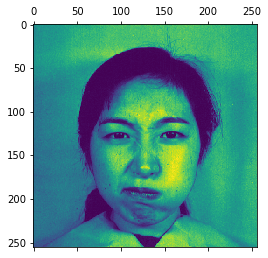

In [42]:
import matplotlib.pyplot as plt
plt.matshow(im)
plt.show()

In [43]:
import pandas as pd
data = pd.read_csv('./Japanese_expression/data.csv')

In [44]:
data.head()

,filepath,student,facial_expression
0,images/KA.AN1.39.tiff,KA,angry
1,images/KA.AN2.40.tiff,KA,angry
2,images/KA.AN3.41.tiff,KA,angry
3,images/KA.DI1.42.tiff,KA,disgust
4,images/KA.DI2.43.tiff,KA,disgust


In [45]:
data['facial_expression'].value_counts()

fear         32
sadness      31
happiness    31
angry        30
surprise     30
neutral      30
disgust      29
Name: facial_expression, dtype: int64

In [46]:
data.shape

(213, 3)

In [47]:
X = []
y = []
for i in range(213):
    path = './Japanese_expression/'+data.iloc[i][0]
    target = data.iloc[i][2]
    y.append(target)
    im = Image.open(path)
    #Reshaping 256 * 256 images to one d array of length 65536
    imarray = np.array(im).reshape(65536)
    X.append(imarray)
#     print(target)
#     plt.matshow(im)

In [137]:
print(len(X[0]))

65536


# Model Training

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)

In [51]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [52]:
model.score(X_test,y_test)

0.765625

neutral ['happiness']


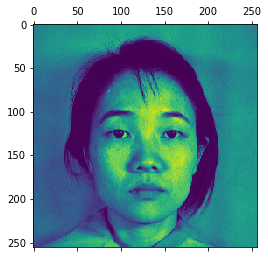

In [53]:
plt.matshow(X_test[0].reshape(256,256))
print(y_test[0],model.predict([X_test[0]]))


In [54]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix

In [55]:
cr = confusion_matrix(y_test,y_pred)

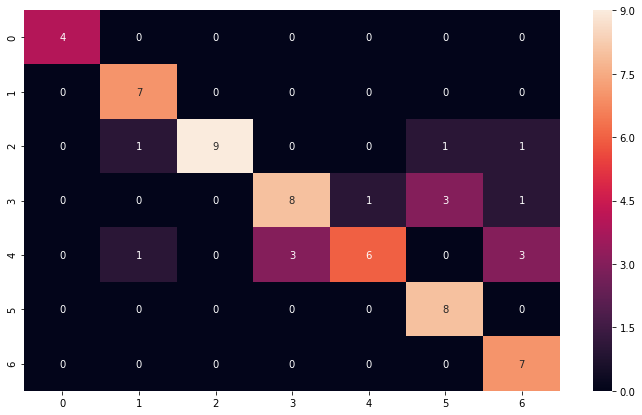

In [138]:
import seaborn as sns
plt.figure(figsize = (12,7))
sns.heatmap(cr,annot=True)
plt.show()

# Finding wrongly predicted images

In [143]:
index = 0
for i in range(len(y_test)):
    if(y_test[i] != y_pred[i]):
        index = i
        print(y_test[i],y_pred[i])
#         plt.imshow(X_test[i].reshape(256,256))
#         plt.title('Actual:'+str(y_test[i])+'   Predicted:'+str(y_pred[i]))

neutral happiness
neutral happiness
neutral happiness
neutral surprise
happiness sadness
fear sadness
happiness sadness
happiness neutral
neutral disgust
happiness sadness
happiness surprise
neutral surprise
fear disgust
fear surprise
neutral surprise


In [144]:
images = []
pred_test = []
actual_test = []
for i in range(len(y_test)):
    if(y_test[i] != y_pred[i]):
        index = i
        print(y_test[i],y_pred[i])
        pred_test.append(y_pred[i])
        actual_test.append(y_test[i])
        images.append(X_test[i].reshape(256,256))
    
#         plt.matshow(images[-1])
#         plt.title('Actual:'+str(y_test[i])+'   Predicted:'+str(y_pred[i]))

neutral happiness
neutral happiness
neutral happiness
neutral surprise
happiness sadness
fear sadness
happiness sadness
happiness neutral
neutral disgust
happiness sadness
happiness surprise
neutral surprise
fear disgust
fear surprise
neutral surprise


In [151]:
def show_images(images: list) -> None:
    n= len(images)
    print(n)
    f = plt.figure()
    num = 0
    fig = plt.figure(figsize = (20,20))
    for i in range(n):
        ax1 = fig.add_subplot(5,3,i+1)
        ax1.imshow(images[i])
        plt.title('Actual:'+str(actual_test[i])+'   Predicted:'+str(pred_test[i]))
    fig.tight_layout()
    plt.show()

15


<Figure size 432x288 with 0 Axes>

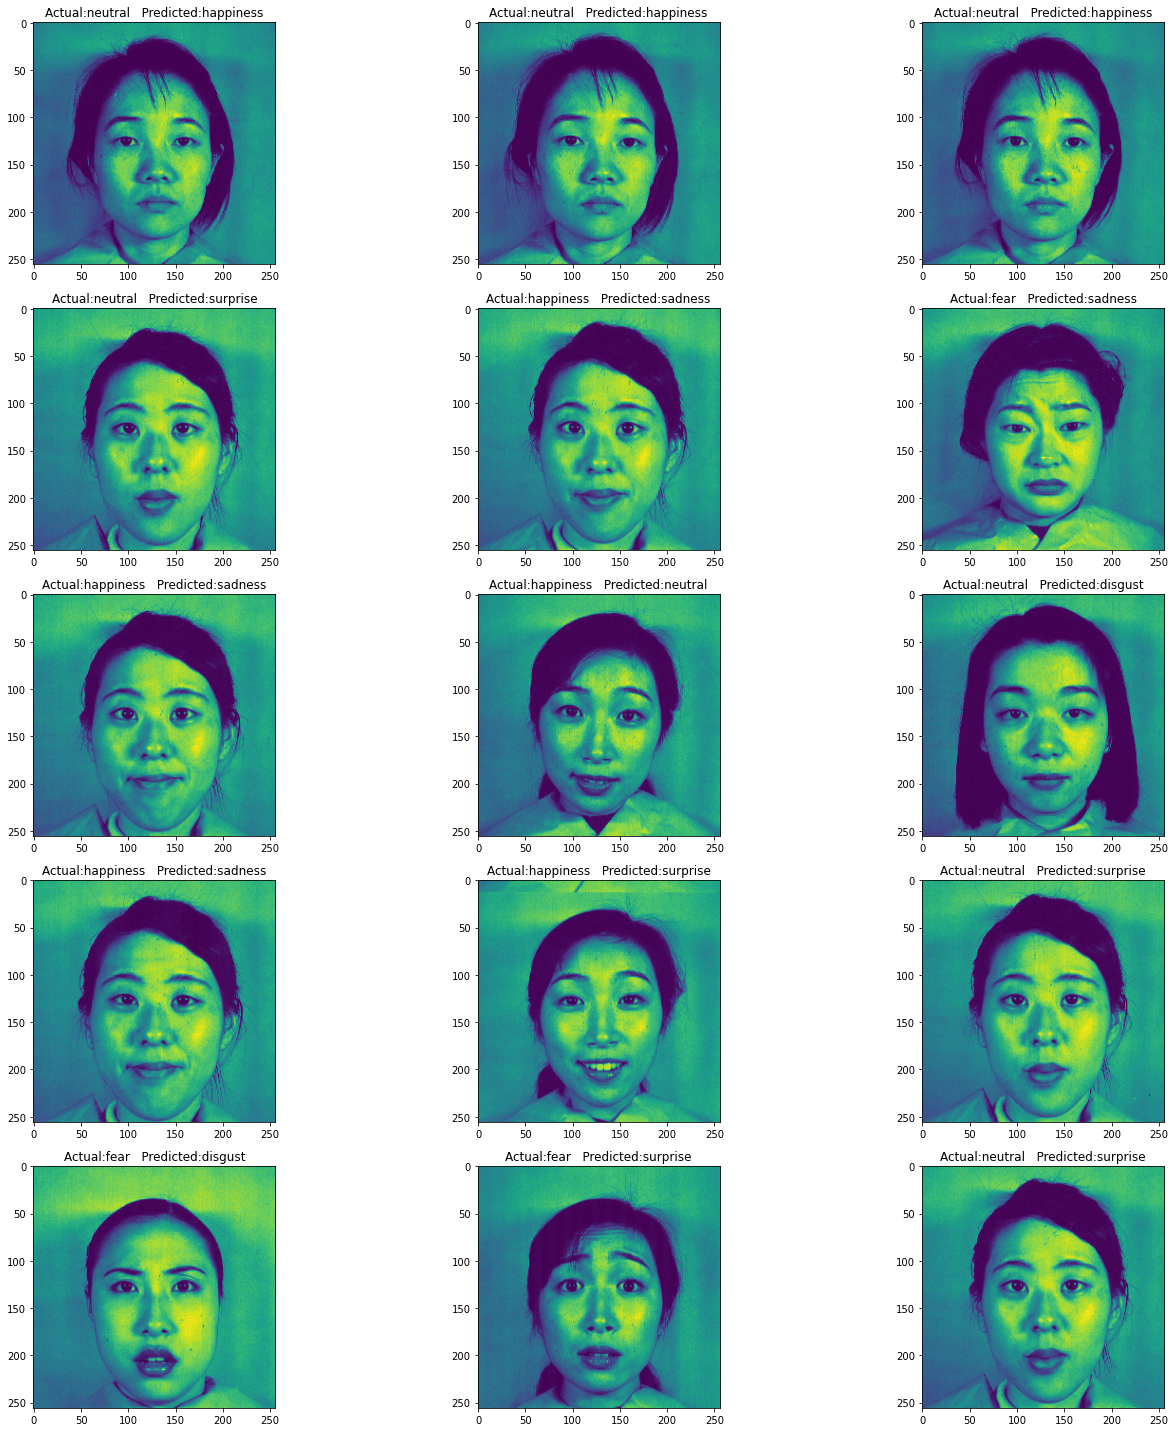

In [152]:
show_images(images)